In [86]:
#importing libraries for data analysis and predictive modelling
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import PowerTransformer
import warnings
warnings.filterwarnings("ignore")

In [87]:
dataset = pd.read_csv("/content/concrete_data.csv")
dataset.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [88]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Cement              1030 non-null   float64
 1   Blast Furnace Slag  1030 non-null   float64
 2   Fly Ash             1030 non-null   float64
 3   Water               1030 non-null   float64
 4   Superplasticizer    1030 non-null   float64
 5   Coarse Aggregate    1030 non-null   float64
 6   Fine Aggregate      1030 non-null   float64
 7   Age                 1030 non-null   int64  
 8   Strength            1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


**Observation 1:** There are no missing values in the dataset.

In [89]:
dataset.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [90]:
#Checking for duplicate rows
print(dataset.shape)
dataset.drop_duplicates(inplace=True)
print(dataset.shape)

(1030, 9)
(1005, 9)


**Observation 2**: There were 25 duplicate rows which have been subsequently removed.

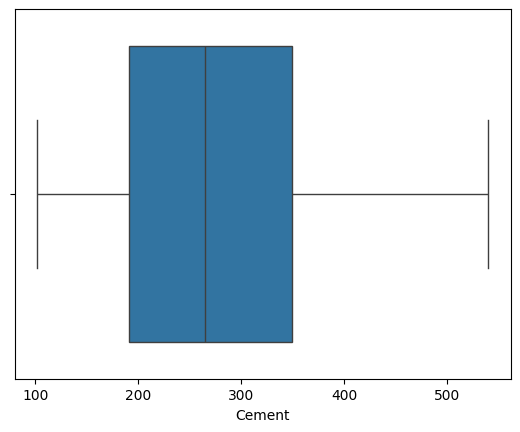

In [91]:
#Outlier Treatment
sns.boxplot(x="Cement",data=dataset)
plt.show()

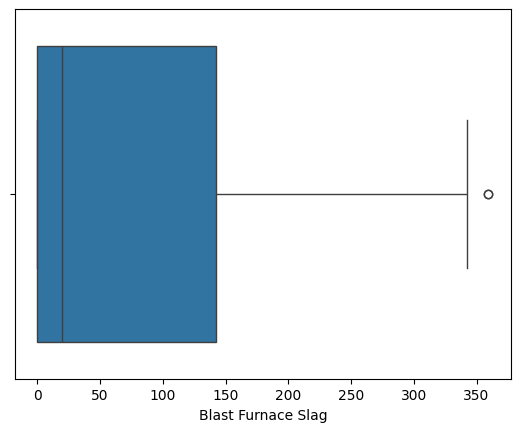

In [92]:
sns.boxplot(x="Blast Furnace Slag",data=dataset)
plt.show()

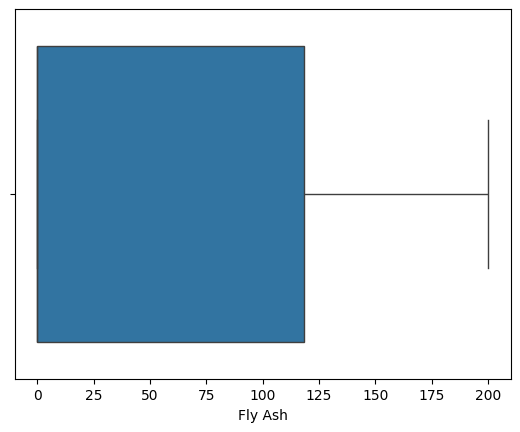

In [93]:
sns.boxplot(x="Fly Ash",data=dataset)
plt.show()

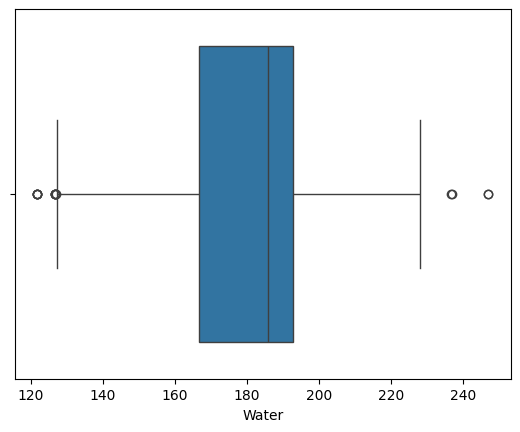

In [94]:
sns.boxplot(x="Water",data=dataset)
plt.show()

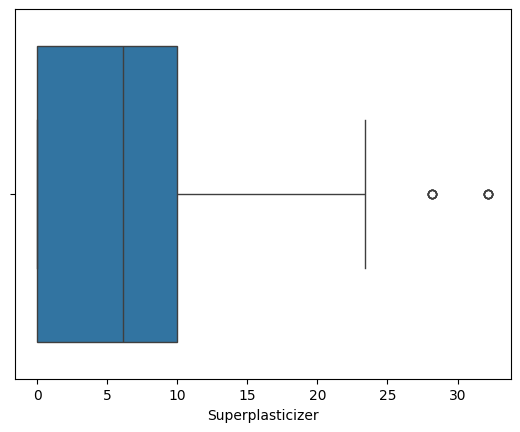

In [95]:
sns.boxplot(x="Superplasticizer",data=dataset)
plt.show()

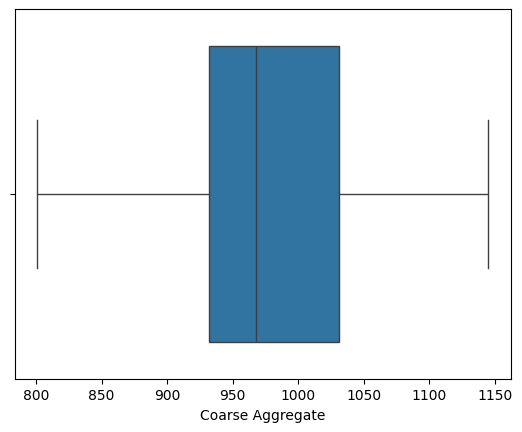

In [96]:
sns.boxplot(x="Coarse Aggregate",data=dataset)
plt.show()

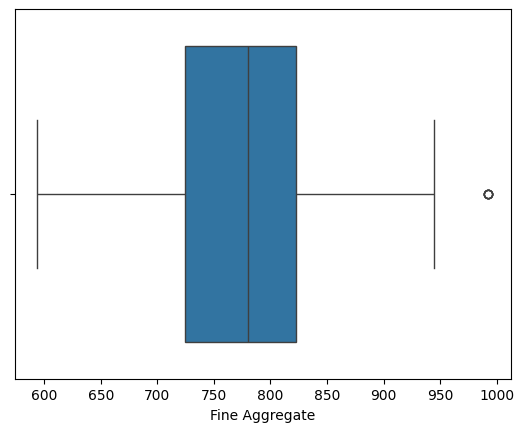

In [97]:
sns.boxplot(x="Fine Aggregate",data=dataset)
plt.show()

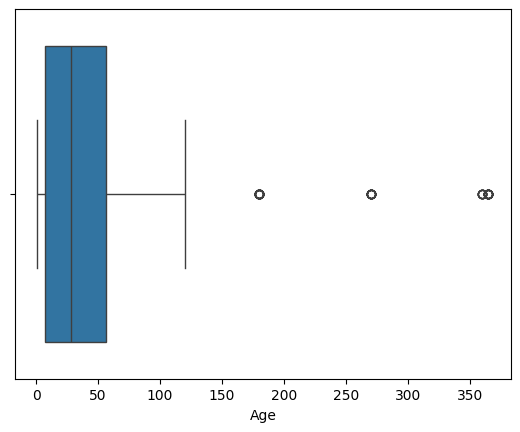

In [98]:
sns.boxplot(x="Age",data=dataset)
plt.show()

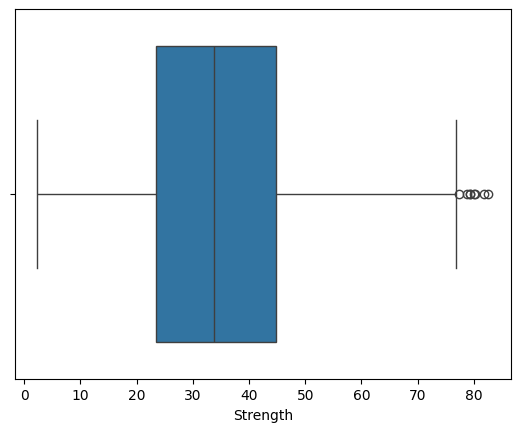

In [99]:
sns.boxplot(x="Strength",data=dataset)
plt.show()

**Observation 3**: There are outliers present in the following columns:


1. Blast Furnace Slag
2. Water
3. Superplasticizer
4. Fine Aggregate
5. Age
6. Strength



In [100]:
q1 = dataset["Blast Furnace Slag"].quantile(0.25)
q3 = dataset["Blast Furnace Slag"].quantile(0.75)
IQR = q3 - q1
min_value = q1 - (1.5 * IQR)
max_value = q3 + (1.5 * IQR)
data_1 = dataset[(dataset["Blast Furnace Slag"]>=min_value) & (dataset["Blast Furnace Slag"]<=max_value)]

**Observation 4**: 2 rows have been lost while removing outliers in Blast Furnace Slag column.

In [101]:
q1 = data_1["Water"].quantile(0.25)
q3 = data_1["Water"].quantile(0.75)
IQR = q3 - q1
min_value = q1 - (1.5 * IQR)
max_value = q3 + (1.5 * IQR)
data_2 = data_1[(data_1["Water"]>=min_value) & (data_1["Water"]<=max_value)]

**Observation 5**: 15 rows have been lost while removing outliers in Water column.

In [102]:
q1 = data_2["Superplasticizer"].quantile(0.25)
q3 = data_2["Superplasticizer"].quantile(0.75)
IQR = q3 - q1
min_value = q1 - (1.5 * IQR)
max_value = q3 + (1.5 * IQR)
data_3 = data_2[(data_2["Superplasticizer"]>=min_value) & (data_2["Superplasticizer"]<=max_value)]

**Observation 6**: 10 rows have been lost while removing outliers in Superplasticizer column.

In [103]:
q1 = data_3["Fine Aggregate"].quantile(0.25)
q3 = data_3["Fine Aggregate"].quantile(0.75)
IQR = q3 - q1
min_value = q1 - (1.5 * IQR)
max_value = q3 + (1.5 * IQR)
data_4 = data_3[(data_3["Fine Aggregate"]>=min_value) & (data_3["Fine Aggregate"]<=max_value)]

In [104]:
q1 = data_4["Age"].quantile(0.25)
q3 = data_4["Age"].quantile(0.75)
IQR = q3 - q1
min_value = q1 - (1.5 * IQR)
max_value = q3 + (1.5 * IQR)
data_5 = data_4[(data_4["Age"]>=min_value) & (data_4["Age"]<=max_value)]

**Observation 7**: 59 rows have been lost while removing outliers in Age column.

In [105]:
q1 = data_5["Strength"].quantile(0.25)
q3 = data_5["Strength"].quantile(0.75)
IQR = q3 - q1
min_value = q1 - (1.5 * IQR)
max_value = q3 + (1.5 * IQR)
data_6 = data_5[(data_5["Strength"]>=min_value) & (data_5["Strength"]<=max_value)]

**Observation 8**: 8 rows have been lost while removing outliers in Strength column.

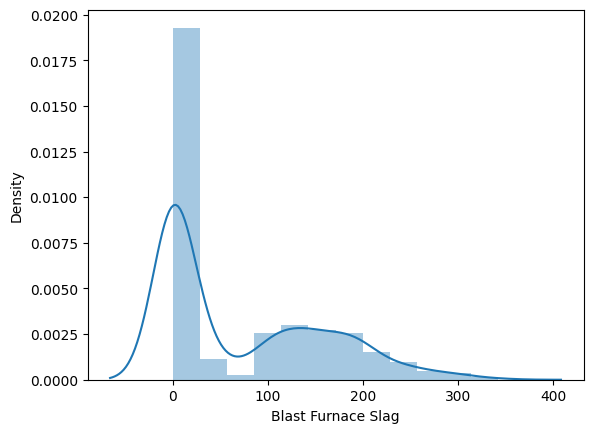

In [106]:
# Now checking for distribution of columns and skewness
sns.distplot(data_6["Blast Furnace Slag"],kde=True)
plt.show()

In [107]:
data_6["Blast Furnace Slag"].skew()

0.8332065345918759

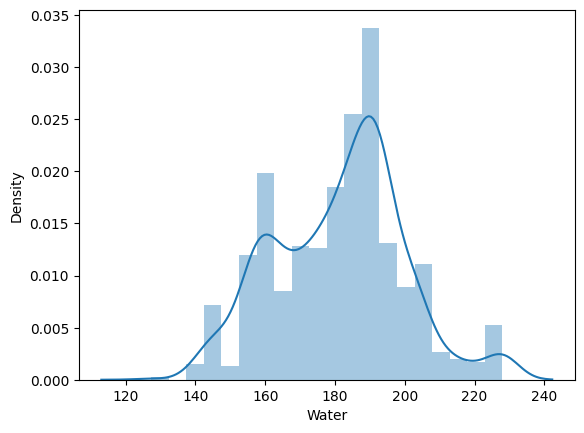

In [108]:
sns.distplot(data_6["Water"],kde=True)
plt.show()

In [109]:
data_6["Water"].skew()

0.044768405622990615

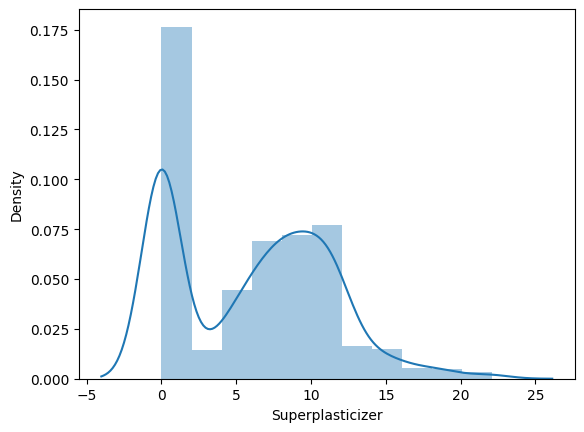

In [110]:
sns.distplot(data_6["Superplasticizer"],kde=True)
plt.show()

In [111]:
data_6["Superplasticizer"].skew()

0.30020725879153515

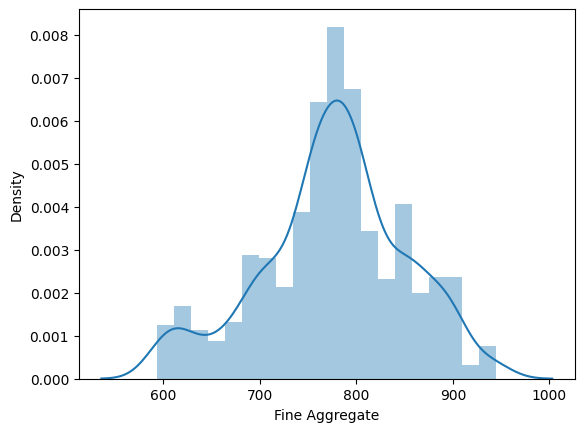

In [112]:
sns.distplot(data_6["Fine Aggregate"],kde=True)
plt.show()

In [113]:
data_6["Fine Aggregate"].skew()

-0.2925714809510098

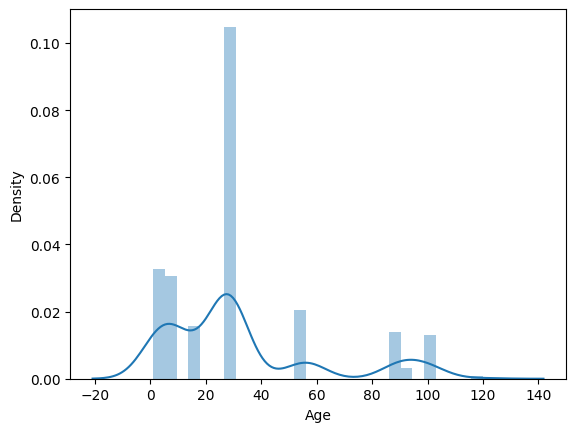

In [114]:
sns.distplot(data_6["Age"],kde=True)
plt.show()

In [115]:
data_6["Age"].skew()

1.274967381854887

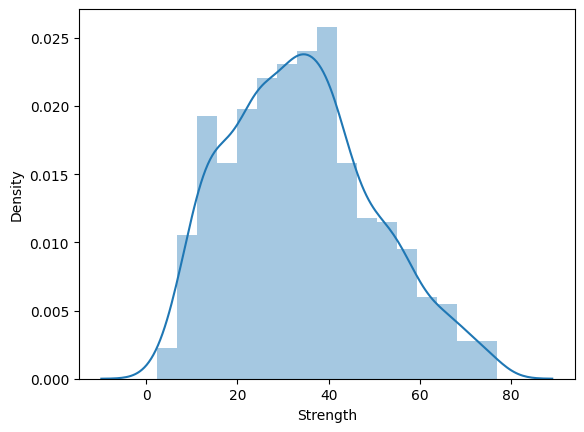

In [116]:
sns.distplot(data_6["Strength"],kde=True)
plt.show()

In [117]:
data_6["Strength"].skew()

0.3866975475650662

In [118]:
data_6["Cement"].skew()

0.5988483025744697

In [119]:
data_6["Fly Ash"].skew()

0.3659144433888319

In [120]:
data_6["Coarse Aggregate"].skew()

-0.13801421912658113

**Observation 9**: The Blast Furnace Slag, Superplasticizer, Fine Aggregate, Age, Strength, Cement and Fly Ash columns are skewed. Function Transformer will have to be applied on them  

In [121]:
skewed_cols = ["Cement","Blast Furnace Slag","Fly Ash","Superplasticizer","Fine Aggregate","Age","Strength"]
pt = PowerTransformer(method="yeo-johnson")
data_6[skewed_cols] = pt.fit_transform(data_6[skewed_cols])

In [122]:
data_6["Cement"].skew()

-0.0073357099796379594

In [123]:
data_6["Blast Furnace Slag"].skew()

0.03165081964240687

In [124]:
data_6["Fly Ash"].skew()

0.02994966679404941

In [125]:
data_6["Superplasticizer"].skew()

-0.24482752565662547

In [126]:
data_6["Fine Aggregate"].skew()

-0.01324594870873281

In [127]:
data_6["Age"].skew()

-0.04802917908875951

In [128]:
data_6["Strength"].skew()

-0.059861341654123434

**Observation 10**: All the columns' features have almost become Gaussian distributed except for superplasticizer.

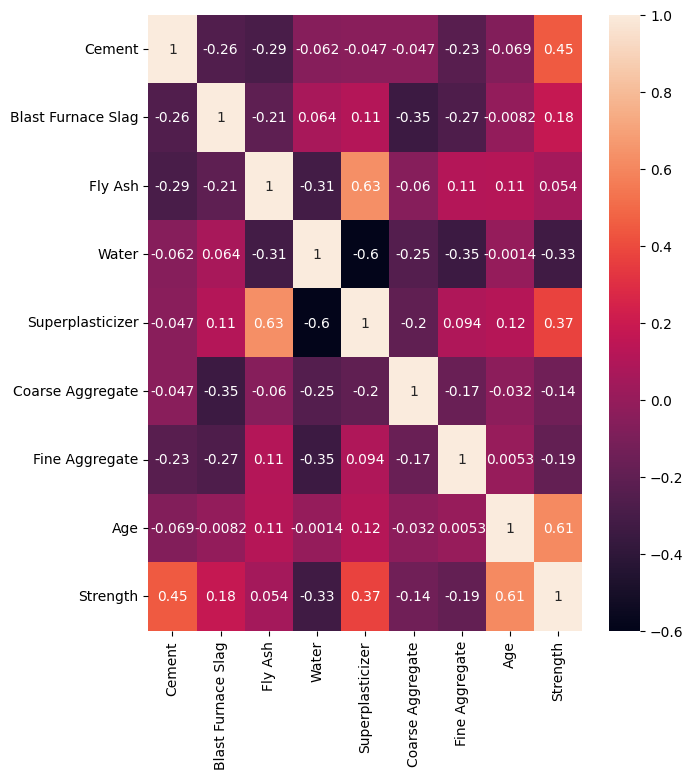

In [132]:
plt.figure(figsize=(7,8))
sns.heatmap(data_6.corr(),annot=True)
plt.show()

**Observation 11**: The correlation coefficient of fly ash column is almost equal to 0. Therefore, we can drop it.

In [133]:
#Feature Selection
data_6.drop("Fly Ash",axis=1,inplace=True)

In [134]:
# Predictive Modelling
x = data_6.iloc[:,:-1]
y = data_6[["Strength"]]

In [135]:
#Transforming columns
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(x)
x = pd.DataFrame(ss.transform(x),columns=x.columns)

In [136]:
ss.fit(y)
y = pd.DataFrame(ss.transform(y),columns=y.columns)

In [138]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import r2_score

x_train, x_test, y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)
lr = LinearRegression()
lr.fit(x_train,y_train)
y_test_pred = lr.predict(x_test)
y_train_pred = lr.predict(x_train)
test_r2 = r2_score(y_test,y_test_pred)
train_r2 = r2_score(y_train,y_train_pred)
RMSE_test = MSE(y_test,y_test_pred) **(1/2)
RMSE_train = MSE(y_train,y_train_pred) **(1/2)
print("test_r2 ",test_r2)
print("train_r2 ",train_r2)
print("RMSE of test dataset ",RMSE_test)
print("RMSE of train dataset ",RMSE_train)

test_r2  0.8673415927840695
train_r2  0.8287648792377191
RMSE of test dataset  0.3792552107693263
RMSE of train dataset  0.40836859265712194


In [141]:
from sklearn.model_selection import cross_val_score

# Evaluate using cross-validation on training set
scores = cross_val_score(lr, x_train, y_train, cv=5, scoring='r2')
print("Cross-validation R² scores:", scores)
print("Mean R² score:", scores.mean())

Cross-validation R² scores: [0.84731189 0.80741948 0.84927241 0.78473244 0.81968166]
Mean R² score: 0.8216835758715888


In [140]:
from sklearn.model_selection import cross_val_score

# Evaluate using cross-validation on training set
scores = cross_val_score(lr, x_test, y_test, cv=5, scoring='r2')
print("Cross-validation R² scores:", scores)
print("Mean R² score:", scores.mean())


Cross-validation R² scores: [0.86950364 0.80645682 0.89439392 0.85474202 0.87009767]
Mean R² score: 0.8590388121752538


**Observation 12**: The model is performing slightly better on testing set compared to training set. This means there is underfitting in the model which has to be rectified

In [143]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# Step 1: Initialize PolynomialFeatures
poly = PolynomialFeatures(degree=3)  # You can change 'degree' to a higher value if needed

# Step 2: Transform the training and test sets
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.transform(x_test)

# Step 3: Fit Linear Regression model on the polynomial features
lr_poly = LinearRegression()
lr_poly.fit(x_train_poly, y_train)

# Step 4: Predict on both training and test sets
y_train_pred_poly = lr_poly.predict(x_train_poly)
y_test_pred_poly = lr_poly.predict(x_test_poly)

# Step 5: Evaluate performance (R² and RMSE)
r2_train_poly = r2_score(y_train, y_train_pred_poly)
r2_test_poly = r2_score(y_test, y_test_pred_poly)

rmse_train_poly = mean_squared_error(y_train, y_train_pred_poly, squared=False)  # RMSE = sqrt(MSE)
rmse_test_poly = mean_squared_error(y_test, y_test_pred_poly, squared=False)

# Print the results
print(f"Train R² (Polynomial): {r2_train_poly}")
print(f"Test R² (Polynomial): {r2_test_poly}")
print(f"Train RMSE (Polynomial): {rmse_train_poly}")
print(f"Test RMSE (Polynomial): {rmse_test_poly}")


Train R² (Polynomial): 0.9239967017508645
Test R² (Polynomial): 0.9049098455247079
Train RMSE (Polynomial): 0.27206465900422
Test RMSE (Polynomial): 0.321093817595242


**Observation 13**: The performance on train dataset is better compared to test dataset now.  

In [152]:
#Evaluating on XGBoosting and Random Tree Regressor Algorithms
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators=20,random_state=42)
rfr.fit(x_train,y_train)
y_test_pred = rfr.predict(x_test)
y_train_pred = rfr.predict(x_train)
test_r2 = r2_score(y_test,y_test_pred)
train_r2 = r2_score(y_train,y_train_pred)
RMSE_test = MSE(y_test,y_test_pred) **(1/2)
RMSE_train = MSE(y_train,y_train_pred) **(1/2)
print("test_r2 ",test_r2)
print("train_r2 ",train_r2)
print("RMSE of test dataset ",RMSE_test)
print("RMSE of train dataset ",RMSE_train)

test_r2  0.9210755470144887
train_r2  0.9807041304502265
RMSE of test dataset  0.29252969440426063
RMSE of train dataset  0.1370844166938532


In [158]:
from xgboost import XGBRegressor
xg = XGBRegressor(n_estimators=20,random_state=42)
xg.fit(x_train,y_train)
y_test_pred = xg.predict(x_test)
y_train_pred = xg.predict(x_train)
test_r2 = r2_score(y_test,y_test_pred)
train_r2 = r2_score(y_train,y_train_pred)
RMSE_test = MSE(y_test,y_test_pred) **(1/2)
RMSE_train = MSE(y_train,y_train_pred) **(1/2)
print("test_r2 ",test_r2)
print("train_r2 ",train_r2)
print("RMSE of test dataset ",RMSE_test)
print("RMSE of train dataset ",RMSE_train)

test_r2  0.9140080809593201
train_r2  0.982278048992157
RMSE of test dataset  0.3053465693877394
RMSE of train dataset  0.13137466483221447
